# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df_0 = pd.read_csv('data/Tweets.csv', encoding='utf-8')

# Quick view

In [3]:
df_0.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df_0.shape

(14640, 15)

# Create new column

In [7]:
df_0['tweet_created'] = pd.to_datetime(df_0['tweet_created'])

### create date

In [8]:
df_0['day'] = df_0['tweet_created'].dt.day
df_0['weekday'] = df_0['tweet_created'].dt.weekday
df_0['hour'] = df_0['tweet_created'].dt.hour

# Start plot 

In [99]:
sns.set(rc={'figure.figsize':(10,4)})
sns.set_context("paper", rc={"font.size":22,"axes.labelsize":24, "axes":22}) 
sns.color_palette('summer');
sns.set(font_scale = 1.5)

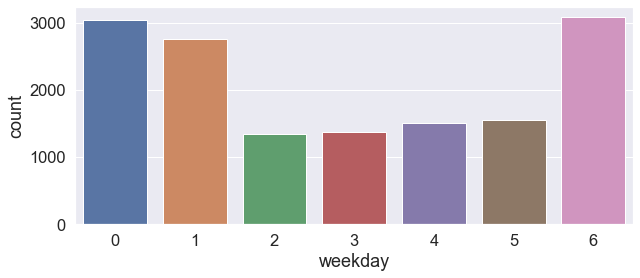

In [105]:
sns.countplot(x='weekday', data=df_0);

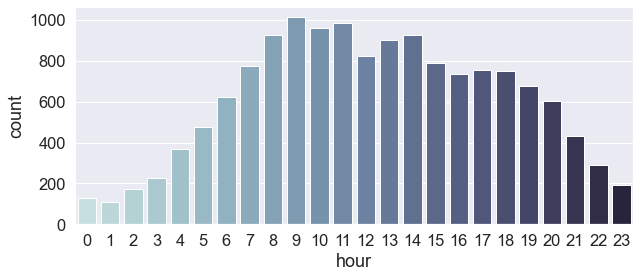

In [101]:
sns.countplot(x='hour', data=df_0, palette="ch:start=.2,rot=-.3");

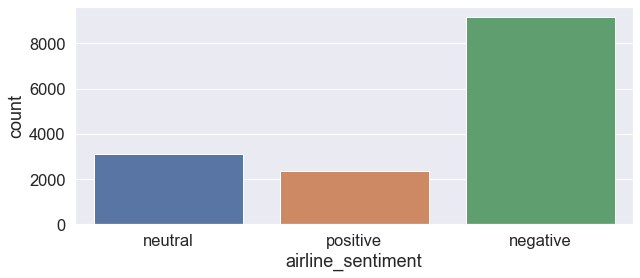

In [102]:
sns.countplot(x='airline_sentiment', data=df_0);

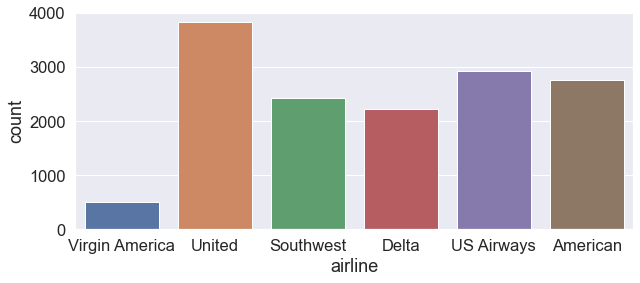

In [103]:
sns.countplot(x='airline', data=df_0);

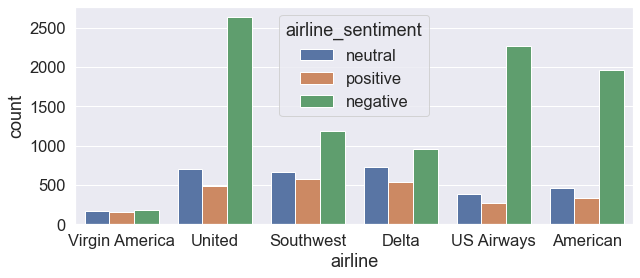

In [104]:
sns.countplot(x='airline', hue='airline_sentiment', data=df_0);

# Reason of negative reviews

In [26]:
df_negative = df_0.copy()

## Drop positive review

In [27]:
df_negative = df_0.loc[df_0['airline_sentiment'] != 'positive']

In [28]:
df_negative.shape

(12277, 18)

## plot by airline company

In [29]:
list_cie = list(df_negative['airline'].unique())
len(list_cie)

6

In [30]:
Xs = []
ys = []

for cie in list_cie:
    df_cie = df_negative.loc[df_negative['airline'] == cie]
    s_negative = df_cie.groupby('negativereason')['negativereason'].count()
    s_negative = s_negative.sort_values(ascending=True)
    x = list(s_negative.index)
    y = list(s_negative.values)
    
    Xs.append(x)
    ys.append(y)

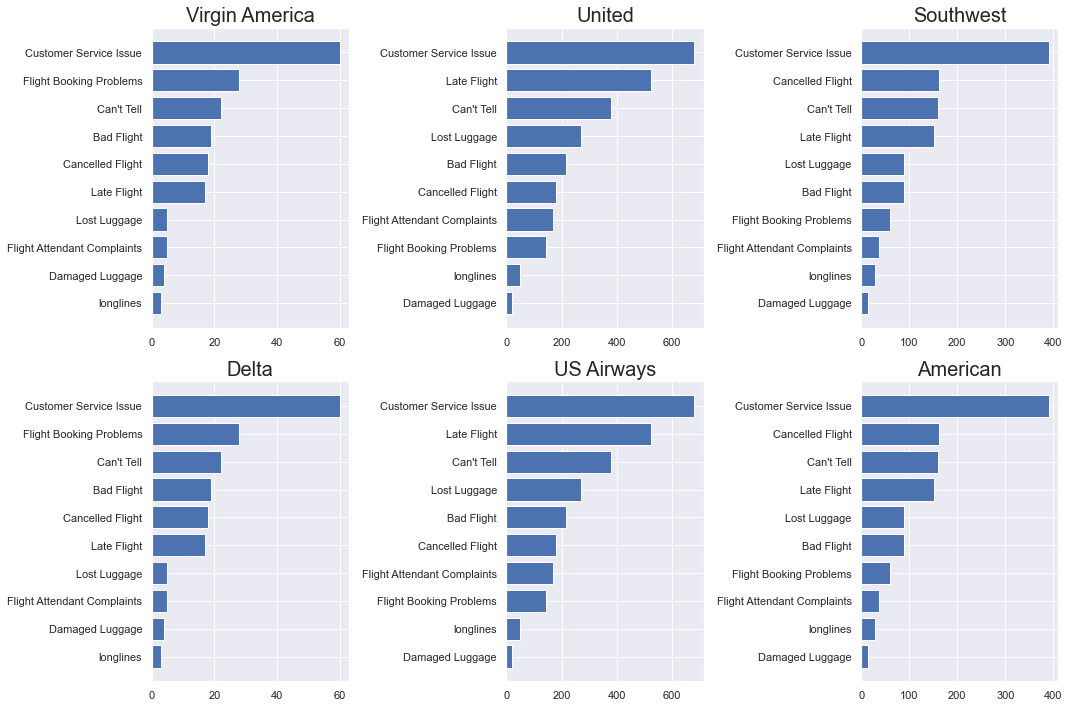

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharey=False)
fig.subplots_adjust(hspace=0.3)

for idx,cie in enumerate(list_cie):
    j = int(idx/3)
    i = idx%3
    
    x = Xs[i]
    y = ys[i]

    axs[j,i].barh(y=x, width=y)
    axs[j,i].set_title(cie, fontsize=20)
    
plt.tight_layout()